<a href="https://colab.research.google.com/github/Paulin178/Machine-Learning/blob/DATASET-Tr%C3%A8s-Large/Gaussian_Mixture_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exactitude du modèle : 0.6565568437241216
Matrice de confusion :
 [[44399 23188]
 [   37     0]]


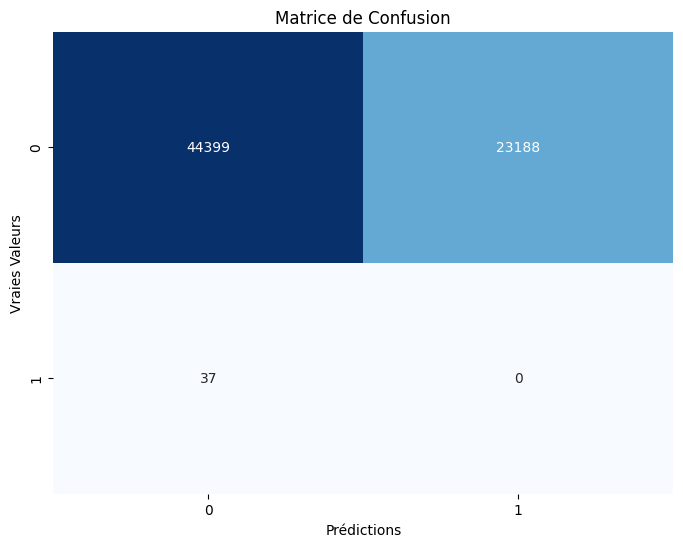

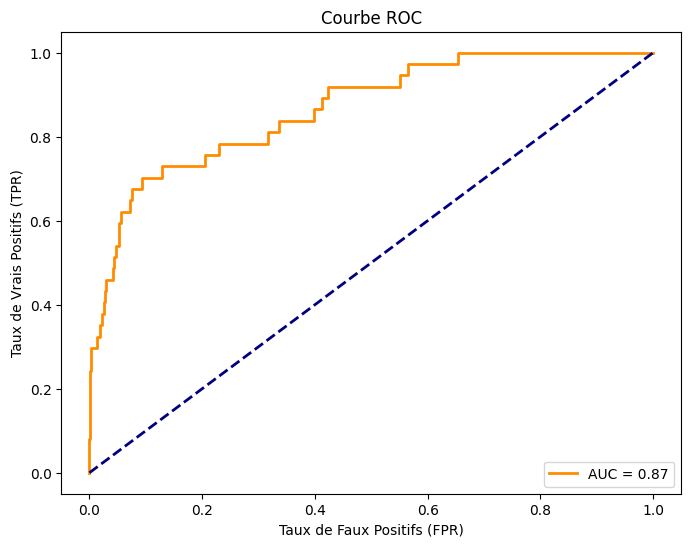

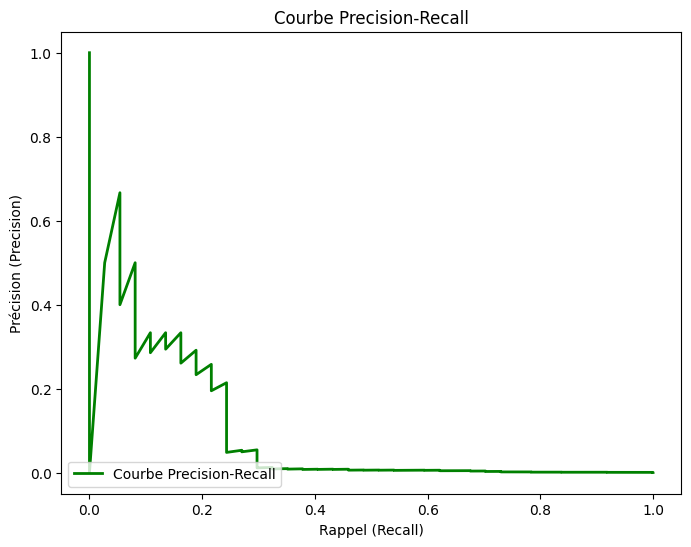

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données à partir du fichier CSV
data = pd.read_csv('clear_data.csv')

# Sélection des colonnes pertinentes dans notre fichier CSV
selected_columns = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
                    'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'isFraud']

# Filtrer le DataFrame pour les colonnes sélectionnées
data = data[selected_columns]

# Supprimer les lignes contenant des valeurs manquantes
data.dropna(inplace=True)

# Encodage des variables catégorielles avec LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['type', 'nameOrig', 'nameDest']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Séparation des caractéristiques (X) et de la variable cible (y)
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise à l'échelle des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création d'un modèle de Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=2, random_state=42)

# Entraînement du modèle
gmm.fit(X_train_scaled)

# Prédictions sur l'ensemble de test
y_pred = gmm.predict(X_test_scaled)

# Calcul de l'exactitude (accuracy) du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modèle :", accuracy)

# Matrice de confusion pour évaluer les prédictions
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_matrix)

# Matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies Valeurs')
plt.show()

# Courbe ROC
y_prob = gmm.score_samples(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, -y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

# Courbe de Précision-Rappel
precision, recall, _ = precision_recall_curve(y_test, -y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label='Courbe Precision-Recall')
plt.xlabel('Rappel (Recall)')
plt.ylabel('Précision (Precision)')
plt.title('Courbe Precision-Recall')
plt.legend(loc='lower left')
plt.show()
